In [4]:
import numpy_financial as npf
!pip install numpy-financial


class Investimento(object):
    def __init__(self, taxa, fluxo_caixa):
        self.taxa: float = taxa
        self.fluxo_caixa: list[float] = fluxo_caixa

    def __calc_vpl__(self) -> float:
        vpl = npf.npv(self.taxa, self.fluxo_caixa)
        return round(vpl, 2)

    def calc_vaue(self) -> float:
        vaue = - npf.pmt(rate=self.taxa,
                         nper=len(self.fluxo_caixa) - 1, pv=self.__calc_vpl__())
        return round(vaue, 2)


def comparar_invest_via_vaue(inv_a: Investimento, inv_b: Investimento):

    # investimento A
    A = inv_a.calc_vaue()
    # investimento B
    B = inv_b.calc_vaue()

    print("Comparação de investimentos considerando VAUE.")

    print("Investimento 1: ",  str(A) + "%")
    print("Investimento 2: ",  str(B) + "%")

    # avaliando qual investimento é melhor
    maior_vaue = A if A > B else B
    print("Melhor investimento, considerando maior valor VAUE é: ",
          str(maior_vaue) + "%")


## VAUE

Este método consiste em achar a série uniforme anual (A) equivalente ao fluxo de caixa dos investimentos à Taxa de Mínima Atratividade (TMA), ou seja, acha-se a série uniforme equivalente a todos os custos e receitas para cada projeto utilizando-se a TMA. O melhor projeto é aquele que tiver o maior saldo positivo. 

O cálculo do VAUE consiste em determinar o que renderia o capital empregado à taxa mínima de atratividade e subtrair este valor, dos saldos líquidos anuais.

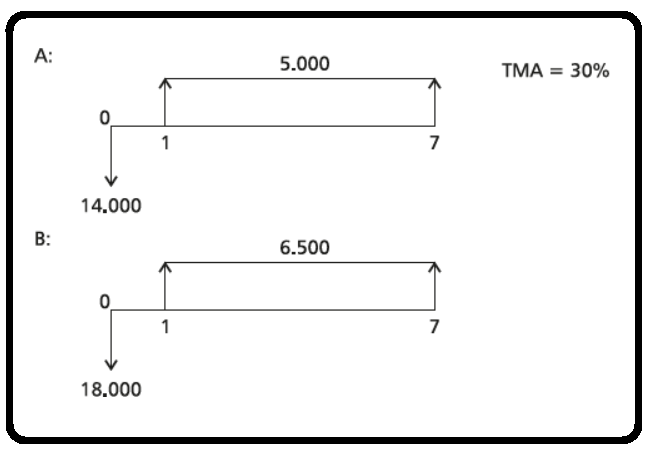


In [5]:

# investimento 1
inv_1 = Investimento(
    taxa=0.3,
    fluxo_caixa=[
        -14_000,
        5_000, 5_000, 5_000, 5_000, 5_000, 5_000, 5_000
    ])

# investimento 2
inv_2 = Investimento(
    taxa=0.3,
    fluxo_caixa=[
        -18_000,
        6_500, 6_500, 6_500, 6_500, 6_500, 6_500, 6_500
    ])

comparar_invest_via_vaue(inv_1, inv_2)


Comparação de investimentos considerando VAUE.
Investimento 1:  3.77%
Investimento 2:  76.27%
Melhor investimento, considerando maior valor VAUE é:  76.27%


## Vidas Diferentes

Exemplo com fluxo de caixa com vidas diferentes, com TMA de 10%.

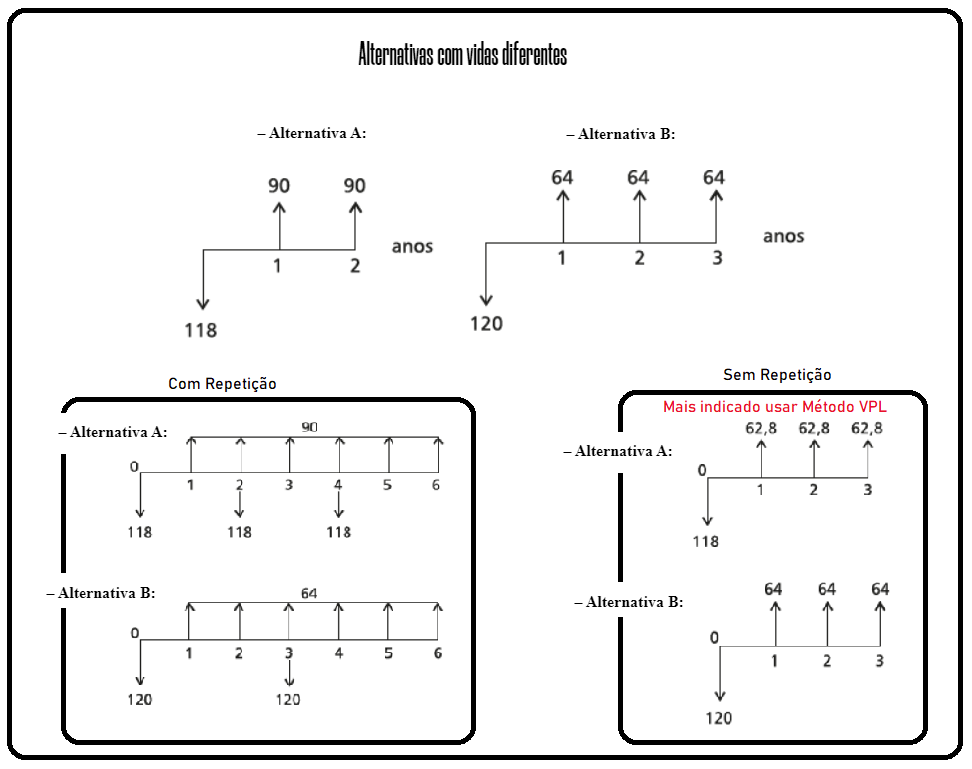

In [6]:
print("Com repetição.")

inv_1 = Investimento(
    taxa=0.1,
    fluxo_caixa=[
        -118,
        90, 90 - 118, 90, 90 - 118, 90, 90
    ])

inv_2 = Investimento(
    taxa=0.1,
    fluxo_caixa=[
        -120,
        64, 64, 64 - 120, 64, 64, 64
    ])

comparar_invest_via_vaue(inv_1, inv_2)


print("Sem repetição.")

inv_1 = Investimento(
    taxa=0.1,
    fluxo_caixa=[
        -118,
        62.8, 62.8, 62.8
    ])

inv_2 = Investimento(
    taxa=0.1,
    fluxo_caixa=[
        -120,
        64, 64, 64
    ])

comparar_invest_via_vaue(inv_1, inv_2)


Com repetição.
Comparação de investimentos considerando VAUE.
Investimento 1:  22.01%
Investimento 2:  15.75%
Melhor investimento, considerando maior valor VAUE é:  22.01%
Sem repetição.
Comparação de investimentos considerando VAUE.
Investimento 1:  15.35%
Investimento 2:  15.75%
Melhor investimento, considerando maior valor VAUE é:  15.75%
